# Bayesian analyses and MCMC

## Defining priors

In [1]:
from likelihood import Priors, LikelihoodFunction
from equations import DM_EXT_model

model = DM_EXT_model()

# Defining the prior intervals manually
intervals_constant = [(40, 120), (0, 300), (-9, 5), (-3, 0)]  # H_0, Omega_m, omega_0
distributions_constant = ['gaussian', 'gaussian', 'uniform', 'gaussian']

intervals_p2 = [(40, 120), (0, 300), (-9, 5), (-3, 0), (-3, 3)]  # H_0, Omega_m, omega_0, omega_a
distributions_p2 = ['gaussian', 'gaussian', 'uniform', 'gaussian', 'gaussian']

intervals_p3 = [(40, 120), (0, 300), (-9, 5), (-3, 0), (-3, 3)]  # H_0, Omega_m, omega_0, omega_a
distributions_p3 = ['gaussian', 'gaussian', 'uniform', 'gaussian', 'gaussian']

# Creating specific instances of the priors
#P_constant = Priors(['\\Omega_m', 'H_0', '\\omega_0', 'DM_{host,0}'], intervals_constant)
P_constant = Priors(['H_0', 'A', '\\beta', '\\omega_0'], intervals_constant, distributions_constant)
P_p2 = Priors(['H_0', 'A', '\\beta', '\\omega_0', '\\omega_a'], intervals_p2, distributions_p2)
P_p3 = Priors(['H_0', 'A', '\\beta', '\\omega_0', '\\omega_a'], intervals_p3, distributions_p3)

# Creating an instance of the likelihood model
LF_constant = LikelihoodFunction(
    lambda z, H_0, A, beta, omega_0: model.DM_ext_th(
        z=z,
        f_IGM=0.83,
        #DM_host_0=96*(1+z)**0.83,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        A=A,
        beta=beta,
        omega_0=omega_0,
        cosmo_type='non_standard',
        param_type='constant'
    )
)

LF_p2 = LikelihoodFunction(
    lambda z, H_0, A, beta, omega_0, omega_a: model.DM_ext_th(
        z=z,
        f_IGM=0.83,
        #DM_host_0=96*(1+z)**0.83,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        A=A,
        beta=beta,
        omega_0=omega_0,  
        omega_a=omega_a,
        cosmo_type='non_standard',
        param_type='CPL'
    )
)

LF_p3 = LikelihoodFunction(
    lambda z, H_0, A, beta, omega_0, omega_a: model.DM_ext_th(
        z=z,
        f_IGM=0.83,
        #DM_host_0=96*(1+z)**0.83,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        A=A,
        beta=beta,
        omega_0=omega_0,  
        omega_a=omega_a,
        cosmo_type='non_standard',
        param_type='BA'
    )
)

## Preparing the samples

### Analysis for 16 FRBs

In [2]:
from obs_data import FRB_data
import ultranest

# Instantiate the FRB_data class for 16 FRBs
frb_data_16 = FRB_data(n_frb=16)

# Call the select_data method to get the observed data
z_obs_16, DM_obs_ext_16, DM_obs_ext_error_16 = frb_data_16.select_data()

z_values_16 = z_obs_16
dm_ext_obs_16 = DM_obs_ext_16
dm_ext_errors_16 =  DM_obs_ext_error_16

# Configuring the ultranest samplers
sampler_constant_16 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_constant.prior_transform
)

sampler_p2_16 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p2.prior_transform
)

sampler_p3_16 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p3.prior_transform
)

### Analysis for 50 FRBs

In [3]:
"""# Instantiate the FRB_data class for 50 FRBs
frb_data_50 = FRB_data(n_frb=50)

# Call the select_data method to get the observed data
z_obs_50, DM_obs_ext_50, error_plus_50, error_minus_50 = frb_data_50.select_data()

z_values_50 = z_obs_50
dm_ext_obs_50 = DM_obs_ext_50
dm_error_plus_50 =  error_plus_50
dm_error_minus_50 =  error_minus_50

# Configuring the ultranest samplers
sampler_constant_50 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_constant.prior_transform
)

sampler_p2_50 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p2.prior_transform
)

sampler_p3_50 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p3.prior_transform
)"""

'# Instantiate the FRB_data class for 50 FRBs\nfrb_data_50 = FRB_data(n_frb=50)\n\n# Call the select_data method to get the observed data\nz_obs_50, DM_obs_ext_50, error_plus_50, error_minus_50 = frb_data_50.select_data()\n\nz_values_50 = z_obs_50\ndm_ext_obs_50 = DM_obs_ext_50\ndm_error_plus_50 =  error_plus_50\ndm_error_minus_50 =  error_minus_50\n\n# Configuring the ultranest samplers\nsampler_constant_50 = ultranest.ReactiveNestedSampler(\n    P_constant.param_names,\n    lambda params: LF_constant.log_likelihood(\n        params,\n        z_values=z_values_50,\n        y_obs=dm_ext_obs_50,\n        err_pos=error_plus_50,\n        err_neg=error_minus_50\n    ),\n    P_constant.prior_transform\n)\n\nsampler_p2_50 = ultranest.ReactiveNestedSampler(\n    P_p2.param_names,\n    lambda params: LF_p2.log_likelihood(\n        params,\n        z_values=z_values_50,\n        y_obs=dm_ext_obs_50,\n        err_pos=error_plus_50,\n        err_neg=error_minus_50\n    ),\n    P_p2.prior_transfor

### Analysis for 64 FRBs

In [4]:
# Instantiate the FRB_data class for 63 FRBs
frb_data_63 = FRB_data(n_frb=63)

# Call the select_data method to get the observed data
z_obs_63, DM_obs_ext_63, DM_obs_ext_error_63 = frb_data_63.select_data()

z_values_63 = z_obs_63
dm_ext_obs_63 = DM_obs_ext_63
dm_ext_errors_63 =  DM_obs_ext_error_63

# Configuring the ultranest samplers
sampler_constant_63 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_63,
        y_obs=dm_ext_obs_63,
        errors=dm_ext_errors_63
    ),
    P_constant.prior_transform
)

sampler_p2_63 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_63,
        y_obs=dm_ext_obs_63,
        errors=dm_ext_errors_63
    ),
    P_p2.prior_transform
)

sampler_p3_63 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_63,
        y_obs=dm_ext_obs_63,
        errors=dm_ext_errors_63
    ),
    P_p3.prior_transform
)

In [5]:
result1_16 = sampler_constant_16.run(min_num_live_points=400)
sampler_constant_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5  0 [-4.7437..-4.7436]*| it/evals=2870/17647 eff=16.6406% N=400   
[ultranest] Likelihood function evaluations: 17655
[ultranest]   logZ = -7.287 +- 0.04355
[ultranest] Effective samples strategy satisfied (ESS = 1631.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.04, need <0.5)
[ultranest]   logZ error budget: single: 0.06 bs:0.04 tail:0.01 total:0.04 required:<0.50
[ultranest] done iterating.

logZ = -7.276 +- 0.084
  single instance: logZ = -7.276 +- 0.057
  bootstrapped   : logZ = -7.287 +- 0.083
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 34.2  │ ▁ ▁▁▁▁▁▁▁▂▂▂▃▃▄▄▆▆▇▇▇▇▆▆▃▄▃▃▂▁▁▁▁▁▁ ▁ │102.8     70.6 +- 9.1
    A                   : -21   │ ▁   ▁▁▁▁▁▂▂▄▄▅▆▇▇▇▇▇▅▅▄▂▂▁▁▁▁▁▁▁    ▁ │343       149 +- 40
    \beta               : -9.0  │▃▃▃▃▄▃▄▄▅▃▅▅▅▆▇▆

In [6]:
"""result1_50 = sampler_constant_50.run(min_num_live_points=400)
sampler_constant_50.print_results()"""

'result1_50 = sampler_constant_50.run(min_num_live_points=400)\nsampler_constant_50.print_results()'

In [7]:
result1_63 = sampler_constant_63.run(min_num_live_points=400)
sampler_constant_63.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-75.3660..-75.3659]*| it/evals=3987/28647 eff=14.1148% N=400  
[ultranest] Likelihood function evaluations: 28647
[ultranest]   logZ = -80.57 +- 0.06066
[ultranest] Effective samples strategy satisfied (ESS = 2074.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.06, need <0.5)
[ultranest]   logZ error budget: single: 0.09 bs:0.06 tail:0.01 total:0.06 required:<0.50
[ultranest] done iterating.

logZ = -80.581 +- 0.146
  single instance: logZ = -80.581 +- 0.089
  bootstrapped   : logZ = -80.575 +- 0.146
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 37    │ ▁▁▁▁▁▁▁▁▁▁▂▂▃▄▅▅▆▇▇▇▇▆▆▆▅▅▃▃▂▂▁▁▁▁▁▁▁ │113       77 +- 10
    A                   : 73    │ ▁ ▁  ▁▁▁▁▁▂▂▄▄▅▆▇▆▇▇▇▆▅▅▄▃▂▁▁▁▁▁▁▁▁▁▁ │216       146 +- 16
    \beta               : -5.5  │ ▁▁ ▁▁ ▁▁▁▁▁

In [8]:
result2_16 = sampler_p2_16.run(min_num_live_points=400)
sampler_p2_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5  2 [-4.7375..-4.7375]*| it/evals=2872/26213 eff=11.1262% N=400   
[ultranest] Likelihood function evaluations: 26229
[ultranest]   logZ = -7.266 +- 0.04376
[ultranest] Effective samples strategy satisfied (ESS = 1608.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.04, need <0.5)
[ultranest]   logZ error budget: single: 0.06 bs:0.04 tail:0.01 total:0.04 required:<0.50
[ultranest] done iterating.

logZ = -7.272 +- 0.085
  single instance: logZ = -7.272 +- 0.057
  bootstrapped   : logZ = -7.266 +- 0.084
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 32.9  │ ▁▁ ▁ ▁▁▁▁▁▁▂▂▄▄▄▅▆▇▆▇▇▇▅▅▅▃▃▂▂▁▁▁▁▁▁▁ │103.2     71.4 +- 9.2
    A                   : -12   │ ▁   ▁▁▁▁▁▂▁▂▂▄▄▄▅▆▇▇▇▇▆▅▅▄▃▂▂▁▁▁▁▁  ▁ │294       151 +- 40
    \beta               : -9.0  │▄▃▃▃▄▃▄▅▅▄▄▆▅▅▇▆

In [9]:
"""result2_50 = sampler_p2_50.run(min_num_live_points=400)
sampler_p2_50.print_results()"""

'result2_50 = sampler_p2_50.run(min_num_live_points=400)\nsampler_p2_50.print_results()'

In [10]:
result2_63 = sampler_p2_63.run(min_num_live_points=400)
sampler_p2_63.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-75.3733..-75.3732]*| it/evals=4024/29416 eff=13.8682% N=400  
[ultranest] Likelihood function evaluations: 29424
[ultranest]   logZ = -80.69 +- 0.0699
[ultranest] Effective samples strategy satisfied (ESS = 2053.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)
[ultranest]   logZ error budget: single: 0.09 bs:0.07 tail:0.01 total:0.07 required:<0.50
[ultranest] done iterating.

logZ = -80.683 +- 0.111
  single instance: logZ = -80.683 +- 0.090
  bootstrapped   : logZ = -80.687 +- 0.111
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 34    │ ▁  ▁▁▁▁▁▁▂▂▂▃▄▄▅▅▇▇▇▇▆▅▅▄▃▂▂▁▁▁▁▁▁▁ ▁ │118       77 +- 10
    A                   : 80    │ ▁ ▁▁▁▁▁▁▁▂▂▄▄▅▅▆▇▇▇▇▆▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁ │217       145 +- 16
    \beta               : -5.9  │ ▁▁▁ ▁▁▁▁▁▁▁▁

In [11]:
result3_16 = sampler_p3_16.run(min_num_live_points=400)
sampler_p3_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5  1 [-4.7539..-4.7538]*| it/evals=2867/22796 eff=12.8014% N=400   
[ultranest] Likelihood function evaluations: 22796
[ultranest]   logZ = -7.275 +- 0.04362
[ultranest] Effective samples strategy satisfied (ESS = 1636.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.04, need <0.5)
[ultranest]   logZ error budget: single: 0.06 bs:0.04 tail:0.01 total:0.04 required:<0.50
[ultranest] done iterating.

logZ = -7.272 +- 0.087
  single instance: logZ = -7.272 +- 0.056
  bootstrapped   : logZ = -7.275 +- 0.087
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 34.3  │ ▁ ▁ ▁▁▁▁▁▁▂▂▂▃▃▄▅▆▇▆▇▇▇▇▆▅▄▃▂▂▁▁▁▁▁▁▁ │101.0     71.6 +- 9.2
    A                   : -14   │ ▁  ▁▁▁▁▁▁▂▂▂▃▅▅▆▇▇▇▇▇▆▅▅▄▃▂▂▁▁▁▁▁▁▁▁▁ │307       150 +- 39
    \beta               : -9.0  │▄▄▄▄▄▄▄▆▅▅▆▆▇▆▇▇

In [12]:
"""result3_50 = sampler_p3_50.run(min_num_live_points=400)
sampler_p3_50.print_results()"""

'result3_50 = sampler_p3_50.run(min_num_live_points=400)\nsampler_p3_50.print_results()'

In [13]:
result3_63 = sampler_p3_63.run(min_num_live_points=400)
sampler_p3_63.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-75.3995..-75.3992]*| it/evals=4016/30205 eff=13.4742% N=400 
[ultranest] Likelihood function evaluations: 30205
[ultranest]   logZ = -80.67 +- 0.06428
[ultranest] Effective samples strategy satisfied (ESS = 2024.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)
[ultranest]   logZ error budget: single: 0.09 bs:0.06 tail:0.01 total:0.07 required:<0.50
[ultranest] done iterating.

logZ = -80.654 +- 0.143
  single instance: logZ = -80.654 +- 0.090
  bootstrapped   : logZ = -80.668 +- 0.142
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 38    │ ▁▁▁▁▁▁▁▁▁▂▂▂▃▃▄▅▅▅▆▆▇▆▅▅▄▄▃▂▂▂▁▁▁▁▁▁▁ │113       77 +- 10
    A                   : 87    │ ▁▁▁▁▁▁▁▂▂▃▄▄▅▅▆▆▆▇▆▇▆▄▃▃▂▂▁▁▁▁▁▁▁▁▁ ▁ │213       145 +- 16
    \beta               : -7.2  │ ▁▁    ▁ ▁▁▁▁

In [14]:
from getdist import plots, MCSamples

# Extraindo amostras dos resultados
samples1_16 = result1_16['samples']
samples2_16 = result2_16['samples']
samples3_16 = result3_16['samples']

"""samples1_50 = result1_50['samples']
samples2_50 = result2_50['samples']
samples3_50 = result3_50['samples']"""

samples1_63 = result1_63['samples']
samples2_63 = result2_63['samples']
samples3_63 = result3_63['samples']

# Criando objetos MCSamples com os dados
labels1 = P_constant.param_names
names1 = P_constant.param_names
mcsamples1_16 = MCSamples(samples=samples1_16, names=names1, labels=labels1)
#mcsamples1_50 = MCSamples(samples=samples1_50, names=names1, labels=labels1)
mcsamples1_63 = MCSamples(samples=samples1_63, names=names1, labels=labels1)

labels2 = P_p2.param_names
names2 = P_p2.param_names
mcsamples2_16 = MCSamples(samples=samples2_16, names=names2, labels=labels2)
#mcsamples2_50 = MCSamples(samples=samples2_50, names=names2, labels=labels2)
mcsamples2_63 = MCSamples(samples=samples2_63, names=names2, labels=labels2)

mcsamples3_16 = MCSamples(samples=samples3_16, names=names2, labels=labels2)
#mcsamples3_50 = MCSamples(samples=samples3_50, names=names2, labels=labels2)
mcsamples3_63 = MCSamples(samples=samples3_63, names=names2, labels=labels2)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


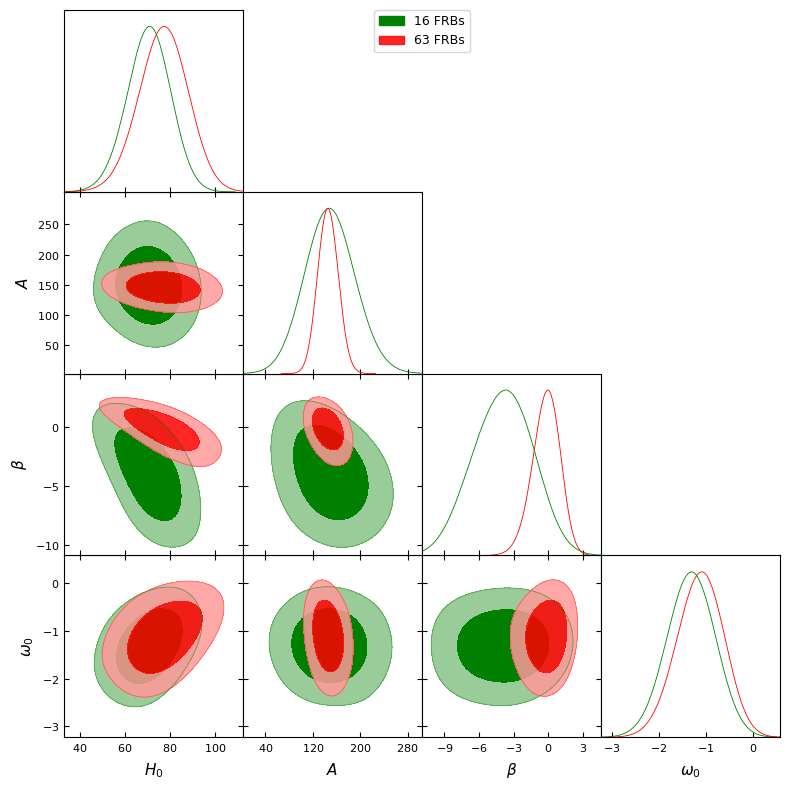

In [15]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples1_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples1_63.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples1_16, mcsamples1_63], filled=True, contour_colors=['green', 'red'], 
                legend_labels=['16 FRBs', '63 FRBs'],) 
                #title_limit=1)
g.export('Figuras/param_constant.png', dpi=600)

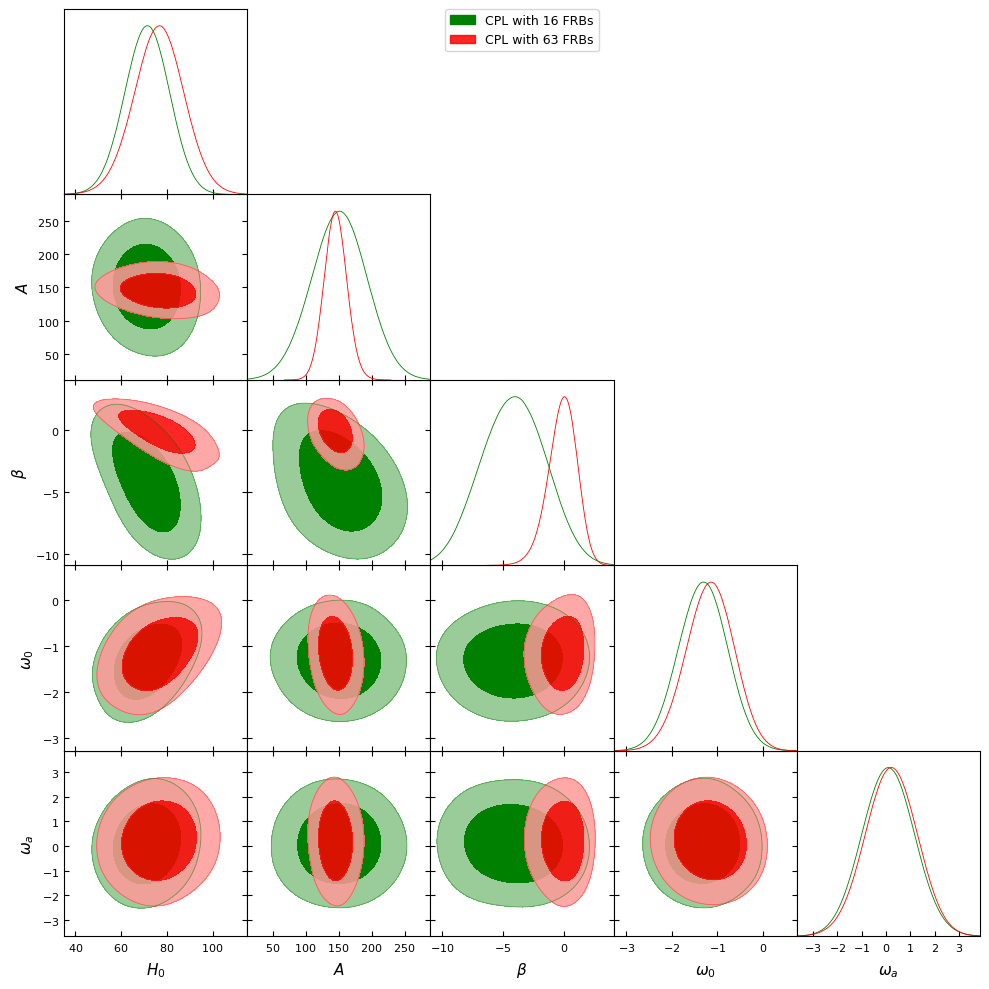

In [18]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples2_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples2_63.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples2_16, mcsamples2_63], filled=True, contour_colors=['green', 'red'], 
                legend_labels=['CPL with 16 FRBs', 'CPL with 63 FRBs'],) 
                #title_limit=1)
g.export('Figuras/param_CPL.png', dpi=600)

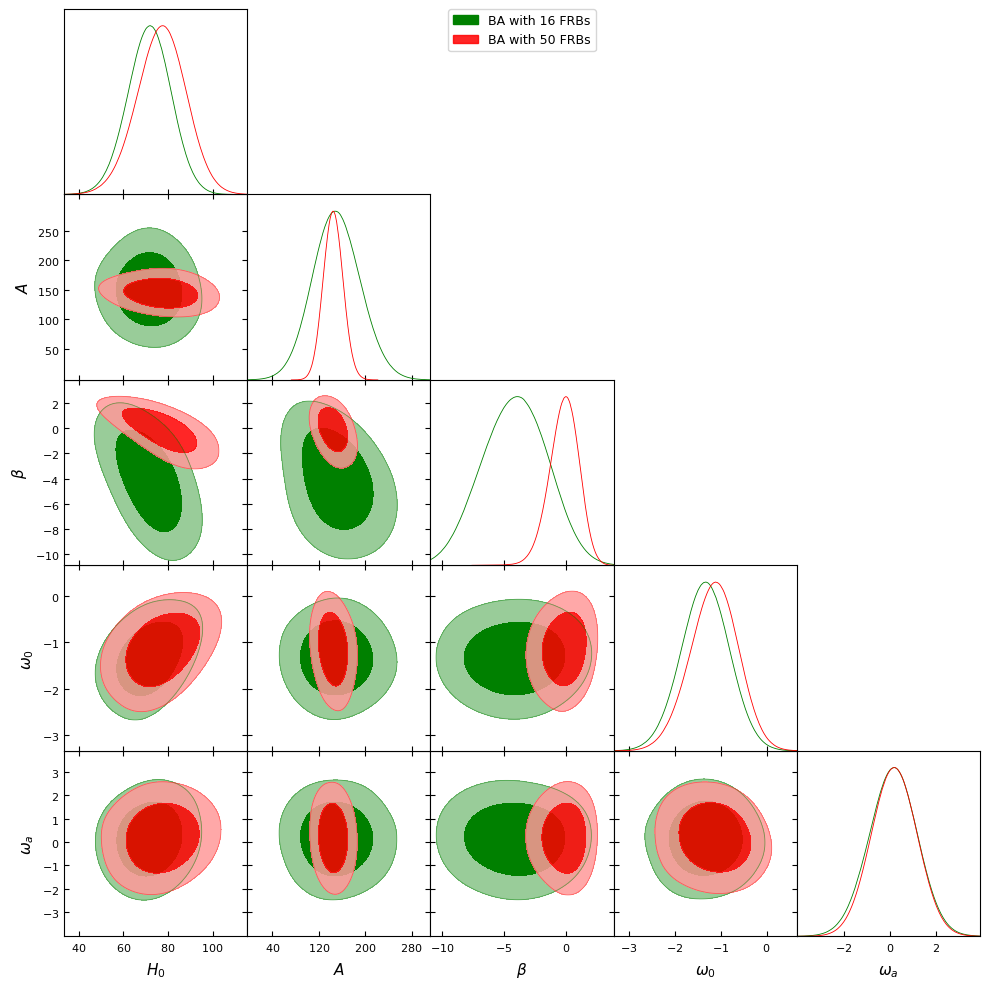

In [19]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples3_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples3_63.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples3_16, mcsamples3_63], filled=True, contour_colors=['green', 'red'], 
                legend_labels=['BA with 16 FRBs', 'BA with 50 FRBs'],) 
                #title_limit=1)
g.export('Figuras/param_BA.png', dpi=600)

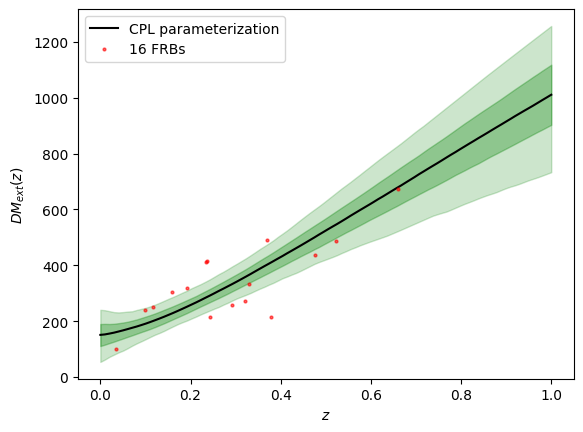

In [22]:
from ultranest.plot import PredictionBand
from equations import DM_EXT_model
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('$z$')
plt.ylabel('$DM_{ext}(z)$')
plt.errorbar(x=z_values_16, y=dm_ext_obs_16, fmt='o', alpha=0.6, color='red', label='16 FRBs', ms=2)

z_test = np.linspace(0, 1, 100)

band = PredictionBand(z_test)
model_fit = DM_EXT_model()
# go through the solutions
for H_0, A, beta, omega_0, omega_a  in sampler_p2_16.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test,
        f_IGM=0.83,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        A=A,
        beta=beta,
        omega_0=omega_0,  
        omega_a=omega_a,
        cosmo_type='non_standard',
        param_type='CPL'))

band.line(color='k', linestyle='-', label='CPL parameterization', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/DM_ext_bestfit_16.png', format='png', dpi=600)

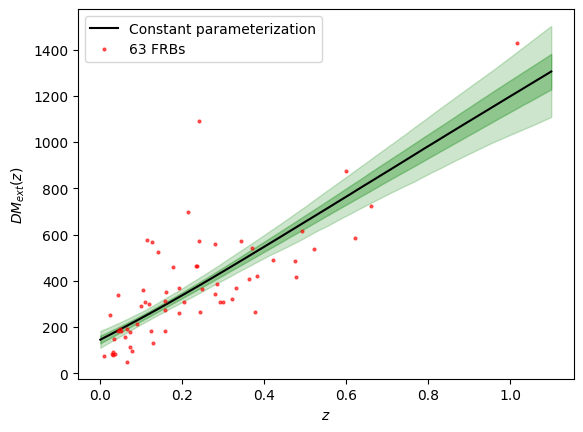

In [24]:
from ultranest.plot import PredictionBand
from equations import DM_EXT_model
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('$z$')
plt.ylabel('$DM_{ext}(z)$')
plt.errorbar(x=z_values_63, y=dm_ext_obs_63, fmt='o', alpha=0.6, color='red', label='63 FRBs', ms=2)

z_test = np.linspace(0, 1.1, 100)

band = PredictionBand(z_test)
model_fit = DM_EXT_model()
# go through the solutions
for H_0, A, beta, omega_0  in sampler_constant_63.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test,
        f_IGM=0.83,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        A=A,
        beta=beta,
        omega_0=omega_0,
        cosmo_type='non_standard',
        param_type='constant')
    )

band.line(color='k', linestyle='-', label='Constant parameterization', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/DM_ext_bestfit_53.png', format='png', dpi=600)